In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:

df= pd.read_csv('letterdata.csv')

In [8]:
df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


<Axes: xlabel='count', ylabel='letter'>

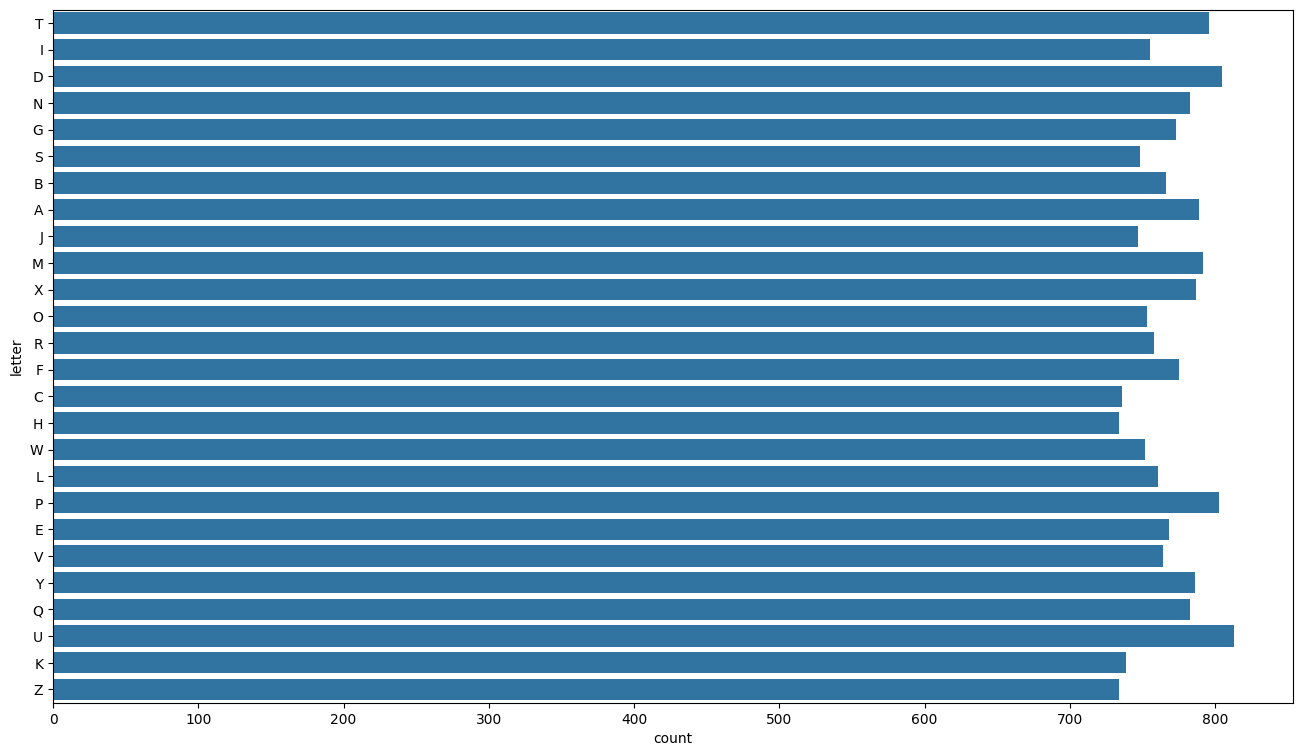

In [9]:
plt.figure(figsize=(16,9))
sns.countplot(y=df['letter'])

In [10]:
## seperate the input and output

In [13]:
x= df.drop('letter',axis=1)
y=df['letter']

In [14]:
x.shape

(20000, 16)

### cross validation

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test, y_train, y_test = train_test_split(x,y,random_state=0,test_size=20)

In [18]:
x_train.shape,x_test.shape

((19980, 16), (20, 16))

### create the model

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
clf= RandomForestClassifier(random_state=0, n_estimators=10)

In [33]:
model = clf.fit(x_train,y_train)

### Evaluate the model

In [34]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay,accuracy_score

In [35]:
y_pred= model.predict(x_test)

In [36]:
accuracy_score(y_test,y_pred)

0.95

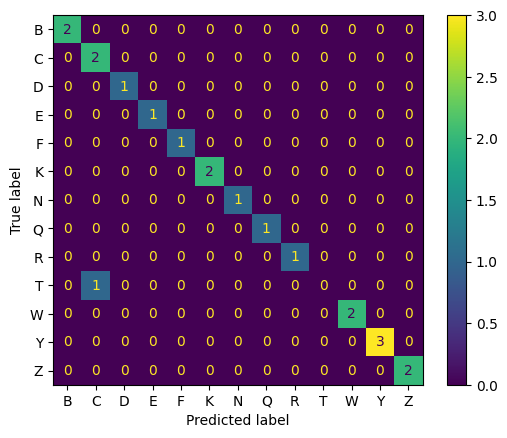

In [37]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred);

In [30]:
new= pd.concat([df.iloc[356:357,:],
               df.iloc[4567:4568,:],
               df.iloc[11565:11566,:]])

In [31]:
new

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
356,N,3,8,4,6,2,7,7,14,2,5,6,8,5,8,0,8
4567,R,6,9,8,7,8,9,5,7,4,7,5,7,6,7,8,9
11565,K,3,3,5,2,2,7,6,2,7,10,6,10,4,7,3,8


In [32]:
y[356],y[4567],y[11565]

('N', 'R', 'K')